# Training Data Display and Analysis
This is notebook is for viewing the data gathered during training runs of our agent. We're currently only supporting one traning file, but in the future we're probably going to split the data up into multiple files.


In [42]:
import numpy as np
import matplotlib
from matplotlib import cm
from matplotlib import colors
from matplotlib import pyplot as plt

BRD_HEIGHT = 20
BRD_WIDTH = 10

data = np.load('training_data.npy').item()

print("Games Played: " + str(len(data['Value'])))
print("States in database: " + str(data['Reward'][0]))
print("Average reward: " + str(data['Reward'][1]))
print("Average when we don't increase block height: " + str(data['R|NotUp'][1]))
print("Average when we increase block height: " + str(data['R|Up'][1]))
print("Average when we cover blocks: " + str(data['R|Cover'][1]))

i = 1
while True:
    tag = "R|Lines_Cleared_" + str(i)
    if tag in data:
        print("Average when we clear " + str(i) + " lines: " + str(data[tag][1]))
    else:
        break
    i = i + 1
    
print("\nMax Value: " + str(np.max(data['Value'])))
print("Min Value: " + str(np.min(data['Value'])))

Games Played: 500
States in database: 10080
Average reward: -4.58591269841
Average when we don't increase block height: 18.1514563107
Average when we increase block height: -7.60976103686
Average when we cover blocks: -7.45799970884
Average when we clear 1 lines: 19.7058823529

Max Value: -24
Min Value: -195


# Average Board State Representations

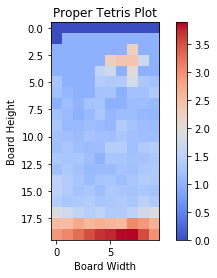

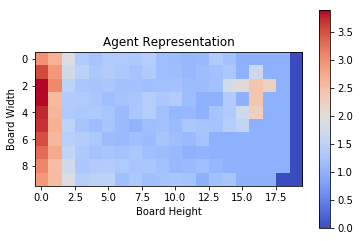

In [43]:
brd = data['Board']
grid = np.zeros((20,10))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[j][i] = brd[i,j,1]
            
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()

plt.title('Proper Tetris Plot')
plt.xlabel('Board Width')
plt.ylabel('Board Height')
plt.show()

grid = np.zeros((10,20))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[9 - i][19 - j] = brd[i][j][1]

plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()
plt.title('Agent Representation')
plt.xlabel('Board Height')
plt.ylabel('Board Width')
plt.show()

# Learning Curve

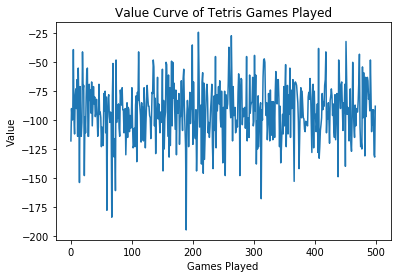

In [44]:
plt.plot(data['Value'])
plt.title('Value Curve of Tetris Games Played')
plt.xlabel('Games Played')
plt.ylabel('Value')
plt.show()

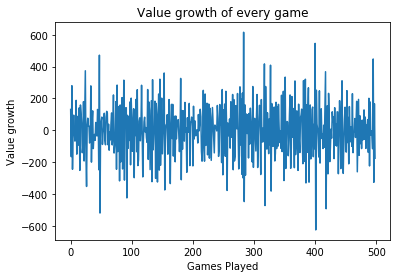

In [40]:
growth = []
for i in range(1, len(data['Value'])):
    growth.append( data['Value'][i] - data['Value'][i - 1])
plt.plot(growth)
plt.title('Value growth of every game')
plt.xlabel('Games Played')
plt.ylabel('Value growth')
plt.show()

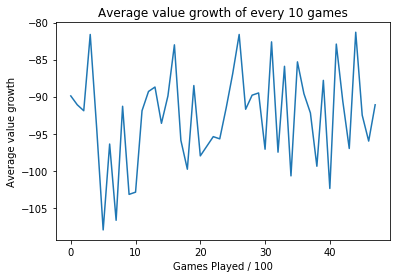

In [45]:
growth = []
for i in range(10, len(data['Value']) - 10, 10):
    growth.append(np.mean(data['Value'][i - 10: i]))

plt.plot(growth)
plt.title('Average value growth of every 10 games')
plt.xlabel('Games Played / 100')
plt.ylabel('Average value growth')
plt.show()